<center>

> ## 📚 Student Profile
> **Name:** Mohammad Sadegh Kalami Yazdi  
> **ID:** `402811068`

</center>


# 1-Data Augmentation


2024-04-30 17:16:06.645861: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 17:16:06.645970: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 17:16:06.774020: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


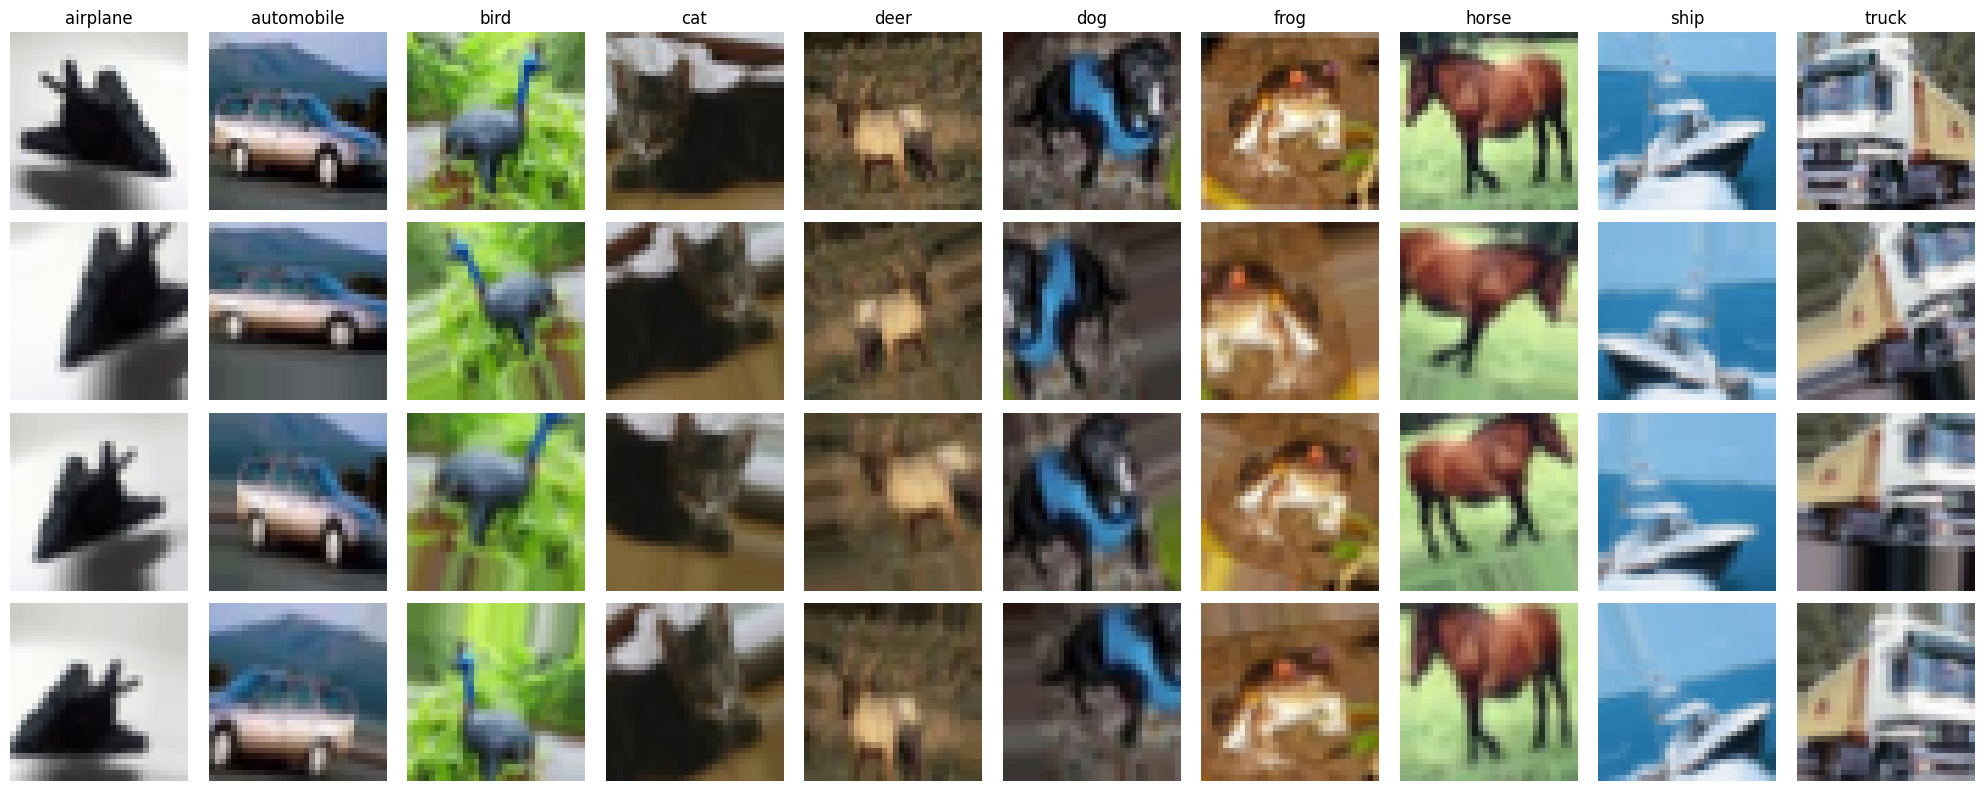

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (_, _) = cifar10.load_data()

unique_classes = np.unique(y_train)
selected_images = np.array([x_train[y_train.flatten() == uclass][0] for uclass in unique_classes])

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

fig, ax = plt.subplots(4, 10, figsize=(20, 8))
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i, img in enumerate(selected_images):
    ax[0, i].imshow(img)
    ax[0, i].set_title(classes[i])
    ax[0, i].axis('off')
    it = datagen.flow(img.reshape((1,) + img.shape), batch_size=1)
    for j in range(1, 4):
        img_aug = next(it)[0].astype('uint8')
        ax[j, i].imshow(img_aug)
        ax[j, i].axis('off')

plt.tight_layout()
plt.show()
